In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
from functools import reduce
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.io import imread_collection
from ast import Yield
import matplotlib.pyplot as plt
import glob
import cv2
import os
import csv

In [ ]:
height= 80
width=200

In [145]:
train_path = 'data/train/*.png'
val_path = 'data/validation/*.png'
y_path = 'data/train.csv'
y_val_path ='data/validation.csv'
Y_train = pd.read_csv(y_path, dtype=str)
Y_val = pd.read_csv(y_val_path, dtype=str)
train = imread_collection(train_path)
val = imread_collection(val_path)
Y_train_digits= []
Y_val_digits = []
Y_train['Label'] = Y_train['Label'].astype(str)
Y_val['Label'] = Y_val['Label'].astype(str)
list_id = Y_val['Id'].tolist()


c =0
window = 33
X_train=[]
X_val=[]
X_val_digits=[]
for image in train:

    for x in range (1,7):
        roi = image[0:height, window*(x-1):window*x]
        grayscale_image = color.rgb2gray(roi)
        flattened_image = grayscale_image.ravel()
        normalized_image = (flattened_image - flattened_image.min()) / (flattened_image.max() - flattened_image.min())
        Y_train_digits.append(Y_train['Label'].iloc[c][x-1])
        X_train.append(normalized_image)
        
    c+=1
c =0

for image in val:
    X_val.append(image)
    
    for x in range (1,7):
        roi = image[0:80, window*(x-1):window*x]
        grayscale_image = color.rgb2gray(roi)
        flattened_image = grayscale_image.ravel()
        normalized_image = (flattened_image - flattened_image.min()) / (flattened_image.max() - flattened_image.min())
        Y_val_digits.append(Y_val['Label'].iloc[c][x-1])
        X_val_digits.append(normalized_image)
        
    c+=1
    
X_train = np.array(X_train).reshape(-1, height, window, 1)
X_val_digits =np.array(X_val_digits).reshape(-1, height, window, 1)
Y_train_digits = pd.DataFrame(Y_train_digits, columns=['Label'])
Y_val_digits = pd.DataFrame(Y_val_digits, columns=['Label'])

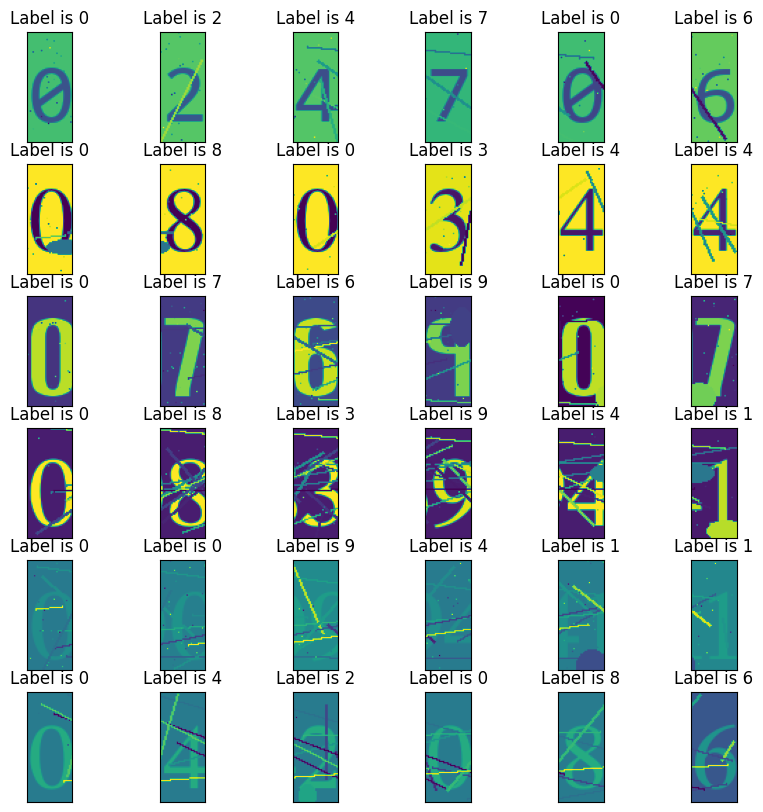

In [183]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    label = Y_train_digits.iloc[i]['Label']
    plt.title(f'Label is {label}')


plt.show()

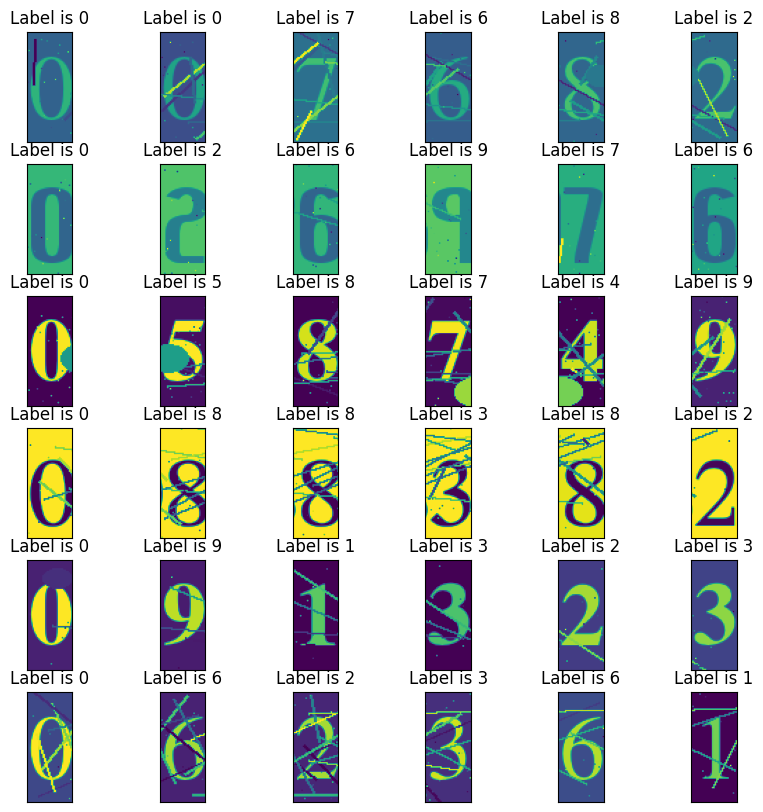

In [184]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_val_digits[i])
    label = Y_val_digits.iloc[i]['Label']
    plt.title(f'Label is {label}')


plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Y_train_labels = Y_train_digits['Label'].to_numpy()
y_combine = LabelEncoder().fit_transform(Y_train_labels)
y_one_hot = OneHotEncoder().fit_transform(y_combine.reshape(len(y_combine),1))

In [150]:
from keras.utils import to_categorical
Y_train_one_hot = to_categorical(Y_train_digits)
Y_val_one_hot = to_categorical(Y_val_digits)

In [151]:
print(Y_train_one_hot.shape)
print(Y_val_one_hot.shape)

(60000, 10)
(6000, 10)


In [152]:
X_train= np.array(X_train)
print(X_train.shape)
print(X_val_digits.shape)


(60000, 80, 33, 1)
(6000, 80, 33, 1)


In [218]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),
    strides=None,
    padding='valid',))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),
    strides=None,
    padding='valid',))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),
    strides=None,
    padding='valid',))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [223]:
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [224]:
model.fit(X_train, Y_train_one_hot, validation_data=(X_val_digits, Y_val_one_hot), epochs=7)

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9857 - loss: 0.0433 - val_accuracy: 0.9717 - val_loss: 0.1176
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9899 - loss: 0.0330 - val_accuracy: 0.9687 - val_loss: 0.1574
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9875 - loss: 0.0383 - val_accuracy: 0.9703 - val_loss: 0.1614
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9887 - loss: 0.0344 - val_accuracy: 0.9727 - val_loss: 0.1439
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9891 - loss: 0.0343 - val_accuracy: 0.9677 - val_loss: 0.1624
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9902 - loss: 0.0304 - val_accuracy: 0.9683 - val_loss: 0.1606
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9907 - loss: 0.0318 - val_accuracy: 0.9708 - val_loss: 0.1468


In [157]:
# from keras.models import save_model
# from keras.models import load_model
# model.save('model.keras')

In [225]:
loaded_model=load_model('model.keras')

In [226]:
loaded_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 78, 31, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 39, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 37, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 18, 6, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 4, 256)     │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 8, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,231,904 (4.70 MB)

 Trainable params: 410,634 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 821,270 (3.13 MB)

In [227]:

aa=0
output=[]
captcha=[]
id=0
for example in X_val_digits:

    pred = np.argmax(loaded_model.predict(example.reshape(1, 80, window, 1)))
    captcha.append(pred)
    
    if aa == 5:
        joined = ''.join(map(str, captcha))
        output.append([list_id[id],joined])
        captcha = []
        aa = 0
        id+=1
    else:
        aa += 1

csv_file_path = "output.csv"
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Id', 'Label'])
    writer.writerows(output)

    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

In [144]:
list_id

method